In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/My Drive/VA_HW/final_project'

/content/gdrive/My Drive/VA_HW/final_project


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install pycaret[analysis]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 85.6 MB/s eta 0:00:00


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('US_Accidents_Dec21.csv')
cleaned_df = df.dropna()
    # Remove duplicates
cleaned_df = cleaned_df.drop_duplicates()
cleaned_df.reset_index()

    # Convert date columns to datetime format
date_columns = [
        'Start_Time',
        'End_Time',
        'Weather_Timestamp',
        'Sunrise_Sunset',
        'Civil_Twilight',
        'Nautical_Twilight',
        'Astronomical_Twilight'
]
for col in date_columns:
    if col in cleaned_df.columns:
      cleaned_df[col] = pd.to_datetime(cleaned_df[col], errors='coerce')
cleaned_df    
cleaned_df = cleaned_df.reset_index(drop=True)  

In [ ]:
# let's inspect the attributes
cleaned_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,120144.000000,120144.000000,120144.000000,120144.000000,120144.000000,120144.000000,120144.000000,120144.000000,120144.000000,120144.000000,120144.000000,120144.000000,120144.000000,120144.00000
mean,2.054235,34.706121,-93.944258,34.706505,-93.943953,0.312229,7382.647498,72.047590,71.708428,60.915859,29.458476,9.540911,7.647429,0.00503
std,0.322590,5.565000,17.476317,5.565178,17.476030,0.756407,14546.450730,15.014055,15.860838,22.775277,0.929097,1.976266,5.074561,0.06570
min,2.000000,24.570330,-124.511949,24.570107,-124.509263,0.000000,1.000000,-4.000000,-19.800000,1.000000,16.720000,0.000000,0.000000,0.00000
25%,2.000000,30.052089,-117.227697,30.051570,-117.228793,0.064000,1155.000000,63.000000,63.000000,45.000000,29.310000,10.000000,5.000000,0.00000
50%,2.000000,34.588448,-84.268660,34.590112,-84.268616,0.135000,3752.000000,74.000000,74.000000,63.000000,29.770000,10.000000,7.000000,0.00000
75%,2.000000,38.874853,-80.308249,38.874653,-80.310942,0.311000,9038.250000,83.000000,83.000000,79.000000,29.970000,10.000000,10.000000,0.00000
max,4.000000,48.995778,-68.518753,48.998144,-68.510891,70.129000,753601.000000,156.000000,156.000000,100.000000,56.540000,100.000000,41.000000,9.99000


In [ ]:
cleaned_df = cleaned_df.reset_index(drop=True)  
temp_cleanned_data = cleaned_df[['Severity','Weather_Condition','State','City','Street','Temperature(F)','Wind_Chill(F)','Pressure(in)','Wind_Speed(mph)']]
temp_cleanned_data['year'] = cleaned_df['Weather_Timestamp'].dt.year
temp_cleanned_data['Time'] = cleaned_df['Weather_Timestamp'].dt.hour
time_conditions = [(temp_cleanned_data['Time']>=6)&(temp_cleanned_data['Time']<12),(temp_cleanned_data['Time']>=12)&(temp_cleanned_data['Time']<18),(temp_cleanned_data['Time']>=18)&(temp_cleanned_data['Time']<=23),(temp_cleanned_data['Time']>=0)&(temp_cleanned_data['Time']<6)]
time_categories = ['Morning','Afternoon','Evening','Night']
temp_cleanned_data['Day_Time'] = np.select(time_conditions,time_categories)
temp_cleanned_data
cleaned_data_2017 = temp_cleanned_data.loc[temp_cleanned_data['year'] == 2017]
cleaned_data_2017 = cleaned_data_2017.sort_values(by = ['State','City','Street'])
cleaned_data_2017=cleaned_data_2017.reset_index(drop=True) 
cleaned_data_2017 = cleaned_data_2017.drop(['Time','year'],axis =1)
cleaned_data_2017

<ipython-input-8-2280a109da41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_cleanned_data['year'] = cleaned_df['Weather_Timestamp'].dt.year
<ipython-input-8-2280a109da41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_cleanned_data['Time'] = cleaned_df['Weather_Timestamp'].dt.hour
<ipython-input-8-2280a109da41>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,Severity,Weather_Condition,State,City,Street,Temperature(F),Wind_Chill(F),Pressure(in),Wind_Speed(mph),Day_Time
0,4,Partly Cloudy,AL,Blountsville,Jones Rd,79.0,79.0,29.22,10.0,Afternoon
1,4,Partly Cloudy,AL,Blountsville,US Highway 278,79.0,79.0,29.22,10.0,Afternoon
2,4,Cloudy,AR,Leola,Highway 9,40.0,40.0,29.52,0.0,Morning
3,2,Overcast,AZ,Mayer,S State Route 69,36.0,31.1,29.86,5.8,Morning
4,4,Overcast,AZ,Prescott,S State Route 89,44.1,41.5,29.90,4.6,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1125,4,Light Rain,WI,Wisconsin Rapids,8th St S,34.0,25.5,29.38,11.5,Morning
1126,2,Light Snow,WV,Charleston,Greenbrier St,32.0,24.8,30.52,8.1,Afternoon
1127,4,Cloudy,WY,Bondurant,US Highway 189,34.0,25.0,23.58,12.0,Evening
1128,4,Light Snow,WY,Dayton,US Highway 14,12.9,-0.9,30.32,11.5,Afternoon


In [ ]:
state_list = list((temp_cleanned_data.State.unique()))
state_list

['CT',
 'IL',
 'DC',
 'VA',
 'OH',
 'CO',
 'PA',
 'NJ',
 'ME',
 'FL',
 'NY',
 'MI',
 'IN',
 'MO',
 'KY',
 'MN',
 'LA',
 'TN',
 'NC',
 'CA',
 'GA',
 'MD',
 'ID',
 'OR',
 'WA',
 'WI',
 'MA',
 'MT',
 'UT',
 'IA',
 'NH',
 'NV',
 'AZ',
 'DE',
 'WY',
 'RI',
 'TX',
 'VT',
 'WV',
 'AR',
 'NE',
 'MS',
 'KS',
 'AL',
 'SC',
 'ND',
 'NM',
 'OK']

In [ ]:
cleanned_data_both_years = temp_cleanned_data.drop(['year','Time'],axis= 1)
cleanned_data_both_years

,Severity,Weather_Condition,State,City,Street,Temperature(F),Wind_Chill(F),Pressure(in),Wind_Speed(mph),Day_Time
0,4,Light Rain,CT,Pomfret Center,Brayman Hollow Rd,39.0,36.8,29.89,3.5,Night
1,4,Light Rain,CT,Pomfret Center,Boston Tpke,39.0,36.8,29.89,3.5,Night
2,3,Light Rain,IL,Willowbrook,Kingery Hwy,39.0,32.8,29.96,9.2,Afternoon
3,3,Light Drizzle,IL,Chicago,N Clark St,39.9,33.9,29.97,9.2,Evening
4,4,Light Drizzle,DC,Washington,Benning Rd NE,42.8,37.5,30.13,9.2,Night
...,...,...,...,...,...,...,...,...,...,...
120139,2,Partly Cloudy,CA,Fresno,N Warren Ave,84.0,84.0,29.59,12.0,Evening
120140,2,Fair,SC,Pelzer,Marguerite St,80.0,80.0,28.92,5.0,Evening
120141,2,Fair,FL,Kissimmee,W Irlo Bronson Memorial Hwy,81.0,81.0,29.99,6.0,Evening
120142,2,Fair,FL,Kissimmee,W Irlo Bronson Memorial Hwy,81.0,81.0,29.99,6.0,Evening


In [ ]:
cleaned_data_2021 = temp_cleanned_data.loc[temp_cleanned_data['year'] == 2021]
cleaned_data_2021 = cleaned_data_2021.sort_values(by = ['State','City','Street'])
cleaned_data_2021=cleaned_data_2021.reset_index(drop=True) 
cleaned_data_2021 = cleaned_data_2021.drop(['Time','year'],axis =1)
cleaned_data_2021

,Severity,Weather_Condition,State,City,Street,Temperature(F),Wind_Chill(F),Pressure(in),Wind_Speed(mph),Day_Time
0,4,Fair,AL,Abbeville,US Highway 431 N,79.0,79.0,29.59,0.0,Evening
1,2,Cloudy,AL,Albertville,AL Highway 68,59.0,59.0,28.74,8.0,Morning
2,2,Fair,AL,Alexander City,Highway 280,67.0,67.0,29.33,10.0,Morning
3,2,Partly Cloudy,AL,Altoona,State Highway 75,76.0,76.0,29.45,9.0,Afternoon
4,2,Mostly Cloudy,AL,Altoona,US Highway 278,85.0,85.0,29.36,8.0,Morning
...,...,...,...,...,...,...,...,...,...,...
119009,2,Snow,WV,Walker,US Highway 50,32.0,25.0,29.01,8.0,Morning
119010,2,Cloudy,WV,Waverly,US Highway 50,58.0,58.0,28.88,14.0,Afternoon
119011,2,Cloudy,WV,Worthington,Freedom Hwy,70.0,70.0,28.54,10.0,Evening
119012,2,Cloudy,WV,Worthington,Freedom Hwy,70.0,70.0,28.54,10.0,Evening


In [ ]:
grouped_multiple = temp_cleanned_data.groupby(['State', 'City','Street','Weather_Condition','Day_Time']).agg({'Temperature(F)': ['mean'],'Wind_Chill(F)':['mean'],'Pressure(in)':['mean'],'Wind_Speed(mph)':['mean']})
grouped_multiple.columns = ['Temp_mean', 'Wind_mean', 'Pressure_mean','Wind_speed_mean']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple.loc[(grouped_multiple['State'] == 'AL')&(grouped_multiple['City'] == 'Abbeville')&(grouped_multiple['Street'] == 'Abbev')]
grouped_multiple

,State,City,Street,Weather_Condition,Day_Time,Temp_mean,Wind_mean,Pressure_mean,Wind_speed_mean
0,AL,Abbeville,US Highway 431 N,Fair,Evening,79.0,79.0,29.59,0.0
1,AL,Albertville,AL Highway 68,Cloudy,Morning,59.0,59.0,28.74,8.0
2,AL,Alexander City,Highway 280,Fair,Morning,67.0,67.0,29.33,10.0
3,AL,Altoona,State Highway 75,Partly Cloudy,Afternoon,76.0,76.0,29.45,9.0
4,AL,Altoona,US Highway 278,Mostly Cloudy,Morning,85.0,85.0,29.36,8.0
...,...,...,...,...,...,...,...,...,...
79254,WV,Worthington,Freedom Hwy,Cloudy,Evening,70.0,70.0,28.54,10.0
79255,WY,Bondurant,US Highway 189,Cloudy,Evening,34.0,25.0,23.58,12.0
79256,WY,Cheyenne,US Highway 85,Fair,Afternoon,91.0,91.0,23.94,13.0
79257,WY,Dayton,US Highway 14,Light Snow,Afternoon,12.9,-0.9,30.32,11.5


In [ ]:
grouped_multiple = grouped_multiple.astype({'Street':str})
grouped_multiple.info()
grouped_multiple['Street'] = grouped_multiple['Street'].apply(lambda x: x.strip())
results = grouped_multiple.loc[(grouped_multiple['State'] == 'AL')&(grouped_multiple['City'] == 'Abbeville')&(grouped_multiple['Street'] == 'US Highway 431 N')]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79259 entries, 0 to 79258
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              79259 non-null  object 
 1   City               79259 non-null  object 
 2   Street             79259 non-null  object 
 3   Weather_Condition  79259 non-null  object 
 4   Day_Time           79259 non-null  object 
 5   Temp_mean          79259 non-null  float64
 6   Wind_mean          79259 non-null  float64
 7   Pressure_mean      79259 non-null  float64
 8   Wind_speed_mean    79259 non-null  float64
dtypes: float64(4), object(5)
memory usage: 5.4+ MB


In [ ]:

cleaned_df.reset_index()

,index,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-41019,4,2017-01-01 00:00:00,2017-01-01 06:00:00,41.899002,-72.004979,41.895111,-72.056182,2.647,...,False,False,False,False,False,False,NaT,NaT,NaT,NaT
1,1,A-41020,4,2017-01-01 00:00:00,2017-01-01 06:00:00,41.895111,-72.056182,41.899002,-72.004979,2.647,...,False,False,False,False,False,False,NaT,NaT,NaT,NaT
2,75,A-41067,3,2017-01-02 16:20:00,2017-01-02 22:20:00,41.753837,-87.944860,41.753401,-87.944850,0.030,...,False,False,False,False,False,False,NaT,NaT,NaT,NaT
3,122,A-41088,3,2017-01-02 18:28:00,2017-01-03 00:28:00,41.938463,-87.649455,41.937951,-87.649061,0.041,...,False,True,False,False,False,False,NaT,NaT,NaT,NaT
4,218,A-41124,4,2017-01-03 01:50:00,2017-01-03 07:50:00,38.899876,-76.981440,38.899470,-76.979252,0.121,...,False,False,False,False,False,False,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120139,384671,A-928522,2,2021-07-31 23:44:00,2021-08-01 02:09:00,36.798725,-119.829496,36.800250,-119.831290,0.145,...,False,False,False,False,False,False,NaT,NaT,NaT,NaT
120140,384672,A-761995,2,2021-07-31 23:44:00,2021-08-01 02:04:00,34.646793,-82.473717,34.646908,-82.475021,0.075,...,False,False,False,False,False,False,NaT,NaT,NaT,NaT
120141,384675,A-845750,2,2021-07-31 23:48:00,2021-08-01 00:18:00,28.332584,-81.581445,28.333524,-81.588564,0.438,...,False,False,False,False,False,False,NaT,NaT,NaT,NaT
120142,384676,A-1044191,2,2021-07-31 23:48:00,2021-08-01 00:22:00,28.332588,-81.580357,28.331883,-81.588197,0.479,...,False,False,False,False,False,False,NaT,NaT,NaT,NaT


In [ ]:
# Importing module and initializing setup
from pycaret.regression import *
#reg1 = setup(data = df_insurance, target = 'charges')
reg_2017 = setup(data = cleanned_data_both_years, target = 'Severity')

,Description,Value
0,Session id,3226
1,Target,Severity
2,Target type,Regression
3,Original data shape,"(120144, 10)"
4,Transformed data shape,"(120144, 13)"
5,Transformed train set shape,"(84100, 13)"
6,Transformed test set shape,"(36044, 13)"
7,Numeric features,4
8,Categorical features,5
9,Preprocess,True


In [ ]:
# return best model
rf = create_model('rf')

# run this is you want to compare all the models 
# best = compare_models()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0612,0.1096,0.3311,0.0085,0.0847,0.0171
1,0.0658,0.1118,0.3344,-0.0292,0.0862,0.0199
2,0.0592,0.1013,0.3183,0.0481,0.0816,0.0170
3,0.0630,0.1134,0.3367,0.0182,0.0860,0.0173
4,0.0591,0.1014,0.3185,0.0165,0.0818,0.0171
5,0.0572,0.1018,0.3190,0.0061,0.0816,0.0164
6,0.0566,0.0990,0.3146,0.0270,0.0807,0.0162
7,0.0532,0.0968,0.3112,-0.0041,0.0796,0.0149
8,0.0577,0.1002,0.3165,0.0270,0.0811,0.0164


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0833,0.0821,0.2864,0.0730,0.0732,0.0313,1.4710
br,Bayesian Ridge,0.0832,0.0821,0.2864,0.0730,0.0732,0.0313,0.5900
ridge,Ridge Regression,0.0833,0.0821,0.2864,0.0730,0.0732,0.0313,0.6830
lar,Least Angle Regression,0.0833,0.0821,0.2864,0.0730,0.0732,0.0313,0.5710
huber,Huber Regressor,0.0628,0.0858,0.2929,0.0304,0.0745,0.0205,1.7460
omp,Orthogonal Matching Pursuit,0.0883,0.0883,0.2970,0.0032,0.0759,0.0331,1.0790
lasso,Lasso Regression,0.0886,0.0886,0.2975,-0.0001,0.0760,0.0332,0.8690
dummy,Dummy Regressor,0.0886,0.0886,0.2975,-0.0001,0.0760,0.0332,0.8120
llar,Lasso Least Angle Regression,0.0886,0.0886,0.2975,-0.0001,0.0760,0.0332,0.9610
en,Elastic Net,0.0886,0.0886,0.2975,-0.0001,0.0760,0.0332,1.0010


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

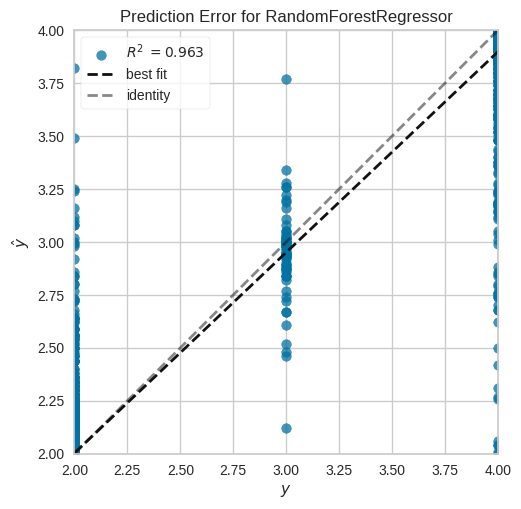

In [ ]:
plot_model(rf, plot = 'error')

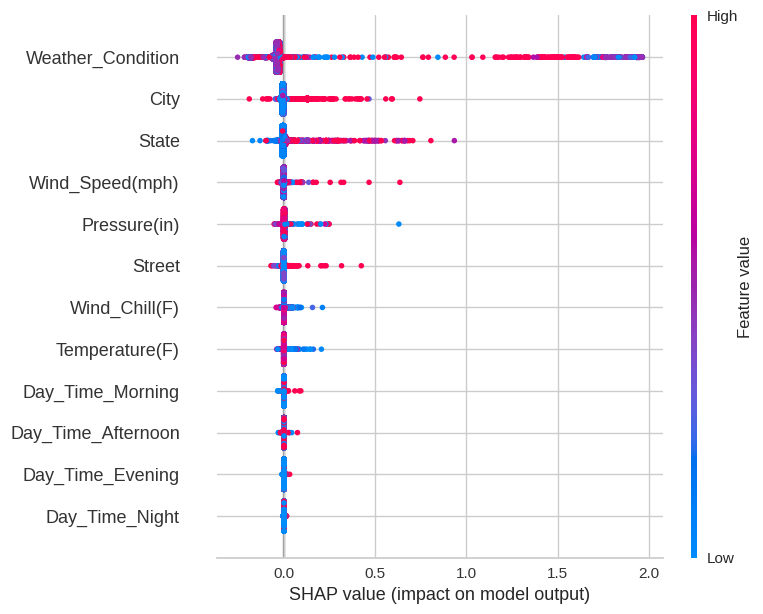

In [ ]:
# interpreting model
interpret_model(rf)

In [ ]:
# finalize a model - use all the data in training
final_rf = finalize_model(rf)

In [ ]:
# generate predictions on unseen data

test_data = pd.DataFrame({'State': ['AL'],'City':['Abbeville'], 
                          'Street': ['US Highway 431 N'], 
                          'Weather_Condition': ['Fair'],
                          'Temperature(F)':[79.0],
                          'Wind_Chill(F)' :[79.0],'Pressure(in)':[29.59],'Wind_Speed(mph)':[0.0],'Day_Time':['Night']
                          })

predictions = predict_model(final_rf, data = test_data)
predictions

,State,City,Street,Weather_Condition,Temperature(F),Wind_Chill(F),Pressure(in),Wind_Speed(mph),Day_Time,prediction_label
0,AL,Abbeville,US Highway 431 N,Fair,79.0,79.0,29.59,0.0,Night,2.0


In [ ]:
# save a model
save_model(final_rf, 'final_rf_model_both_years')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Temperature(F)', 'Wind_Chill(F)',
                                              'Pressure(in)',
                                              'Wind_Speed(mph)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Weather_Condition', 'State',
                                              'City', 'Street', 'Day_Time'],
                                     transformer=SimpleImputer(strategy='most_...
                  TransformerWrapper(include=['Weather_Condition', 'State',
                                              'City', 'Street'],
                                     transformer=LeaveOneOutEncoder(cols=['Weather_Condition',
                                                                          'State',
                                      

In [ ]:
from google.colab import drive
drive.mount('/content/drive')